In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import spherical_jn, spherical_yn , hankel1,lpmv
import cmath

In [7]:
def MieCoefCond(x, n):
    jn = spherical_jn(n, x)
    jn1 = spherical_jn(n+1,x)
    jn_1 = spherical_jn(n-1,x)
    
    hankeln = np.sqrt(np.pi/(2*x))*hankel1(n+1/2,x)
    hankeln1 = np.sqrt(np.pi/(2*x))*hankel1(n+1+1/2,x)
    hankeln_1 = np.sqrt(np.pi/(2*x))*hankel1(n-1+1/2,x)
    
    a = -(jn + x *1/2* (  x* (jn_1-jn1) + jn ))/(hankeln + x  *1/2* ( x*(hankeln_1-hankeln1) + hankeln))

    b = - jn/hankeln  

    
    return a, b

def MieCoef(x, M, n):
    # Computing spherical Bessel functions for n and M*n
    j_n_x = spherical_jn(n, x)
    j_n_Mx = spherical_jn(n, M*x)

    # Computing Riccati-Bessel functions
    psi_n_x = x * j_n_x
    zeta_n_x = x * np.sqrt(np.pi/(2*x))*hankel1(n+1/2,x)

    psi_n_Mx = M * x * j_n_Mx
    zeta_n_Mx = M * x * np.sqrt(np.pi/(2*M*x))*hankel1(n+1/2,M*x)

    # Computing Riccati-Bessel function derivatives using numdifftools
    #psi_n_x_prime = nd.Derivative(lambda x: x * spherical_jn(n, x), n=1, order=1)(x)
    psi_n_x_prime = 1/2* (  x* (spherical_jn(n-1,x)-spherical_jn(n+1,x)) + spherical_jn(n,x) ) 
    
    zeta_n_x_prime = 1/2* np.sqrt(np.pi/(2*x))*(  x* (hankel1(n+1/2-1,x)-hankel1(n+1/2+1,x)) + hankel1(n+1/2,x) )

    #psi_n_Mx_prime = nd.Derivative(lambda x: M * x * spherical_jn(n, M * x), n=1, order=1)(x)
    psi_n_Mx_prime = 1/2* (  M*x* (spherical_jn(n-1,M*x)-spherical_jn(n+1,M*x)) + spherical_jn(n,M*x) ) 
    
    zeta_n_Mx_prime= 1/2* np.sqrt(np.pi/(2*M*x))*(  x* (hankel1(n+1/2-1,M*x)-hankel1(n+1/2+1,M*x)) + hankel1(n+1/2,M*x) )

    # Calculating coefficients a_n, b_n, c_n, d_n
    a_n = (M * psi_n_Mx * psi_n_x_prime - psi_n_Mx_prime * psi_n_x) / (psi_n_Mx_prime * zeta_n_x - M * psi_n_Mx * zeta_n_x_prime)
    b_n = (M * psi_n_Mx_prime * psi_n_x - psi_n_Mx * psi_n_x_prime) / (psi_n_Mx * zeta_n_x_prime - M * psi_n_Mx_prime * zeta_n_x)
    
    #c_n = (psi_n_x * zeta_n_x_prime - psi_n_x_prime * zeta_n_x) / (psi_n_Mx_prime * zeta_n_x - M * psi_n_Mx * zeta_n_x_prime)
    #d_n = (psi_n_x_prime * zeta_n_x - psi_n_x * zeta_n_x_prime) / (psi_n_Mx * zeta_n_x_prime - M * psi_n_Mx_prime * zeta_n_x)

    return a_n, b_n

# Test the function with scalar inputs
wavelength = 1
radius = 5
k = 2 * np.pi / wavelength
x_value = k * radius
print(MieCoef(x_value, 155/133, 30))


((-0.5057268366161177-0.4999672022666795j), (-0.504182820497625-0.4999825037065629j))


In [3]:
def E_SCATnm(n, a_n, b_n, k, r, theta, phi):
    kr = k*r

    hn = np.sqrt(np.pi/(2*kr))*hankel1(n+1/2,kr)
    hn1 = np.sqrt(np.pi/(2*kr))*hankel1(n+1/2+1,kr)
    Pn1 = lpmv(1,n+1,np.cos(theta))
    Pn = lpmv(1,n,np.cos(theta))

    Gn = 1j**(n) 
    prefac = -Gn/(n*(n+1)) * (2*n+1)*1j

    term_r = -a_n/kr * hn  *Pn*n*(n+1)*np.cos(phi)

    term_the = (-a_n/kr* ( (n+1)*hn - kr*hn1 )* (n*Pn1-(n+1)*np.cos(theta)*Pn)/np.sin(theta) -1j* b_n * hn *Pn/np.sin(theta))*np.cos(phi)
    
    term_phi = (a_n/kr* ( (n+1)*hn - kr*hn1 )* Pn/np.sin(theta) +1j* b_n * hn *(n*Pn1-(n+1)*np.cos(theta)*Pn)/np.sin(theta))* np.sin(phi)
        
    return prefac*np.array([ term_r, term_the ,term_phi ])
    

C:\Users\user\AppData\Local\Temp\ipykernel_24376\3584083541.py:41: RuntimeWarning: invalid value encountered in scalar divide
  a_n = (M * psi_n_Mx * psi_n_x_prime - psi_n_Mx_prime * psi_n_x) / (psi_n_Mx_prime * zeta_n_x - M * psi_n_Mx * zeta_n_x_prime)
C:\Users\user\AppData\Local\Temp\ipykernel_24376\3584083541.py:42: RuntimeWarning: invalid value encountered in scalar divide
  b_n = (M * psi_n_Mx_prime * psi_n_x - psi_n_Mx * psi_n_x_prime) / (psi_n_Mx * zeta_n_x_prime - M * psi_n_Mx_prime * zeta_n_x)
C:\Users\user\AppData\Local\Temp\ipykernel_24376\3584083541.py:41: RuntimeWarning: overflow encountered in scalar multiply
  a_n = (M * psi_n_Mx * psi_n_x_prime - psi_n_Mx_prime * psi_n_x) / (psi_n_Mx_prime * zeta_n_x - M * psi_n_Mx * zeta_n_x_prime)
C:\Users\user\AppData\Local\Temp\ipykernel_24376\3584083541.py:41: RuntimeWarning: invalid value encountered in scalar multiply
  a_n = (M * psi_n_Mx * psi_n_x_prime - psi_n_Mx_prime * psi_n_x) / (psi_n_Mx_prime * zeta_n_x - M * psi_n_Mx * z

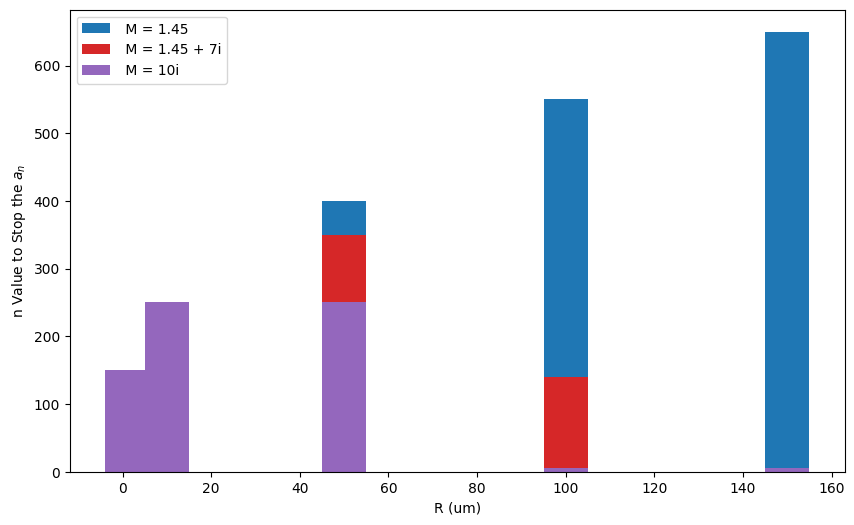

In [4]:
n = [5,10,15,20,25,30,
     40,50,60,70,80,110,120,140,150,160,170,180,200,250,
     300,350,400,450,500,550,600,650,
     700,750,800,850,900,1000,1100,1200,1300,1400,1500,1600,1800,2000]

aa=[]
a=[]
a0=[]

MM,M,M0 =10j, 1.45+7j, 1.45

x = np.array([1,10,50,100,150])
for i in x:
    u,u0,uu=0,0,0
    for j in n:
        aan,bbn = MieCoef(i,MM,j)
        an,bn = MieCoef(i,M,j)
        an0,bn0 = MieCoef(i,M0,j)
        if np.isnan(abs(an)) and u==0:
            a.append(j)
            u+=1
        if np.isnan(abs(an0)) and u0==0:

            a0.append(j)
            u0+=1
        if np.isnan(abs(aan)) and uu==0:

            aa.append(j)
            uu+=1
            
plt.figure(figsize=(10, 6))

plt.bar(x, a0, color='tab:blue', alpha=1,width=10, label=' M = 1.45')
plt.bar(x, a, color='tab:red', alpha=1,width=10, label=' M = 1.45 + 7i')
plt.bar(x, aa, color='tab:purple', alpha=1,width=10, label=' M = 10i')

plt.xlabel('R (um)')
plt.ylabel('n Value to Stop the $a_n$')

plt.legend()

plt.savefig('nStop.png',dpi=300)

In [5]:
# Constants
N = 700
wavelength = 0.65
radius = 1
k = 2 * np.pi / wavelength
x_value = k * radius
M = [1.45,1.45+7j,7j]
phi = 0
theta = np.linspace(-np.pi,np.pi,300)
r = 1000

E0_inc = np.array([np.sin(theta)*np.cos(phi)*np.exp(1j*k*r*np.cos(theta)) ,
                  np.cos(theta)*np.cos(phi)*np.exp(1j*k*r*np.cos(theta))  ,
                  -np.sin(phi)*np.ones(len(theta))*np.exp(1j*k*r*np.cos(theta))  ])  # Initialize the electric field array
E00sca,E0M_sca,E0_sca = 0,0,0

for i in range(1,N):
    a_n, b_n = MieCoef(x_value, M[0], i)
    if np.isnan(abs(a_n))!=True:
        E00sca += E_SCATnm(i, a_n, b_n, k, r, theta, phi)  
    
    a_n, b_n = MieCoef(x_value, M[1], i)
    if np.isnan(abs(a_n))!=True:
        E0M_sca += E_SCATnm(i, a_n, b_n, k, r, theta, phi) 
    
    a_n, b_n = MieCoef(x_value, M[2], i) 
    if np.isnan(abs(a_n))!=True:
        E0_sca += E_SCATnm(i, a_n, b_n, k, r, theta, phi) 


C:\Users\user\AppData\Local\Temp\ipykernel_24376\3584083541.py:41: RuntimeWarning: invalid value encountered in scalar divide
  a_n = (M * psi_n_Mx * psi_n_x_prime - psi_n_Mx_prime * psi_n_x) / (psi_n_Mx_prime * zeta_n_x - M * psi_n_Mx * zeta_n_x_prime)
C:\Users\user\AppData\Local\Temp\ipykernel_24376\3584083541.py:42: RuntimeWarning: invalid value encountered in scalar divide
  b_n = (M * psi_n_Mx_prime * psi_n_x - psi_n_Mx * psi_n_x_prime) / (psi_n_Mx * zeta_n_x_prime - M * psi_n_Mx_prime * zeta_n_x)


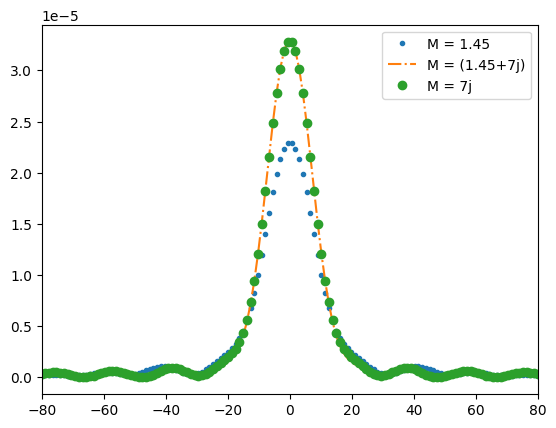

In [6]:
E = E0_sca
U =  abs(E[0])**2 + abs(E[1])**2+abs(E[2])**2

E = E0M_sca
UM =  abs(E[0])**2 + abs(E[1])**2+abs(E[2])**2

E = E00sca
U0 =  abs(E[0])**2 + abs(E[1])**2+abs(E[2])**2

plt.plot(theta*180/np.pi,U0,'.',label=f'M = {M[0]}')
plt.plot(theta*180/np.pi,UM,'-.',label=f'M = {M[1]}')
plt.plot(theta*180/np.pi,U,'o',label=f'M = {M[2]}')

plt.xlim(-80,80)
plt.legend()

C:\Users\user\AppData\Local\Temp\ipykernel_24376\3639166140.py:41: RuntimeWarning: invalid value encountered in scalar divide
  a_n = (M * psi_n_Mx * psi_n_x_prime - psi_n_Mx_prime * psi_n_x) / (psi_n_Mx_prime * zeta_n_x - M * psi_n_Mx * zeta_n_x_prime)
C:\Users\user\AppData\Local\Temp\ipykernel_24376\3639166140.py:42: RuntimeWarning: invalid value encountered in scalar divide
  b_n = (M * psi_n_Mx_prime * psi_n_x - psi_n_Mx * psi_n_x_prime) / (psi_n_Mx * zeta_n_x_prime - M * psi_n_Mx_prime * zeta_n_x)
C:\Users\user\AppData\Local\Temp\ipykernel_24376\3639166140.py:10: RuntimeWarning: invalid value encountered in scalar divide
  a = -(jn + x *1/2* (  x* (jn_1-jn1) + jn ))/(hankeln + x  *1/2* ( x*(hankeln_1-hankeln1) + hankeln))
C:\Users\user\AppData\Local\Temp\ipykernel_24376\3639166140.py:12: RuntimeWarning: invalid value encountered in scalar divide
  b = - jn/hankeln


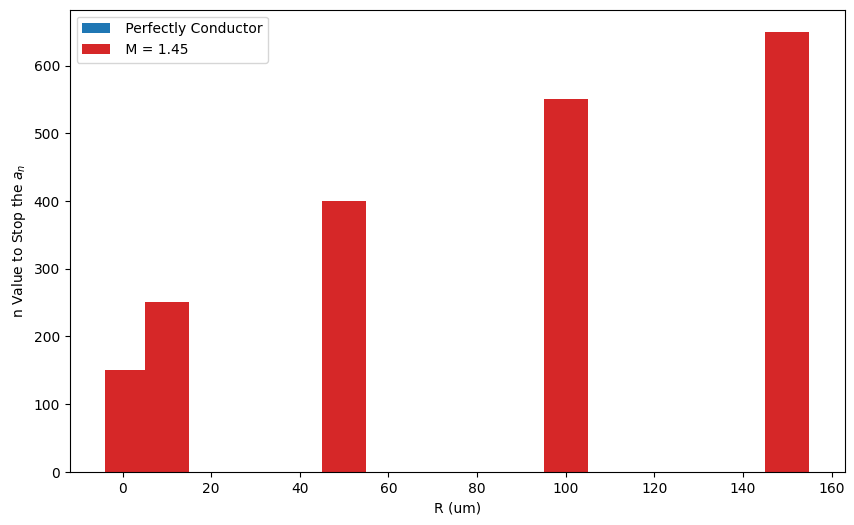

In [17]:
n = [5,10,15,20,25,30,
     40,50,60,70,80,110,120,140,150,160,170,180,200,250,
     300,350,400,450,500,550,600,650,
     700,750,800,850,900,1000,1100,1200,1300,1400,1500,1600,1800,2000]

aa=[]
a=[]
a0=[]

MM,M,M0 =10j, 1.45+7j, 1.45

x = np.array([1,10,50,100,150])
for i in x:
    u,u0,uu=0,0,0
    for j in n:
        ann,bnn = MieCoef(i,M0,j)
        an,bn = MieCoefCond(i,j)
        if np.isnan(abs(ann)) and uu==0:
            a0.append(j)
            uu+=1
        if np.isnan(abs(an)) and u==0:
            a.append(j)
            u+=1

            
plt.figure(figsize=(10, 6))

plt.bar(x, a, color='tab:blue', alpha=1,width=10, label=' Perfectly Conductor')
plt.bar(x, a0, color='tab:red', alpha=1,width=10, label=' M = 1.45')
plt.xlabel('R (um)')
plt.ylabel('n Value to Stop the $a_n$')

plt.legend()

#plt.savefig('nStop.png',dpi=300)